In [10]:
import pandas as pd
import os 
import plotnine as p9
import warnings              #To remove warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt

## Home Advantage of GSW

In [11]:
# get Scores for each game of GSW in the last two seasons
home = pd.concat([pd.read_excel("gameoutcome2017-18.xlsx")[['Unnamed: 5', 'Unnamed: 7']], pd.read_csv("gameoutcome2016-17.csv")[['Unnamed: 5', 'Unnamed: 7']]])
home.columns = ['home', 'result']
home.fillna('N', inplace = True)
home['home'].replace("@", 'Y', inplace = True)

In [12]:
# calculate count of winnings depending on home variable
home.groupby(['home', 'result']).size()

home  result
N     L         17
      W         65
Y     L         22
      W         60
dtype: int64

Exactly half of games were done in home stadium. Roughly judging by counts of result of games, it seems like there is no home advantage to this team.

In [13]:
# winning ratio when the match was not played at home stadium of GSW
print(round(len(home[(home['home'] == "N") & (home['result'] == 'W')])/len(home[home['home'] == "N"]),3))
# winning ratio of home stadium matches
print(round(len(home[(home['home'] == "Y") & (home['result'] == 'W')])/len(home[home['home'] == "Y"]),3))

0.793
0.732


Thus, it is pretty obvious that location does not impact on GSW's outcome, which is contradicting to our preassumptions.

In [14]:
data = pd.concat([pd.read_excel("gameoutcome2017-18.xlsx")[['Unnamed: 5', 'Tm', 'Opp', 'Unnamed: 7']], 
                  pd.read_csv("gameoutcome2016-17.csv")[['Unnamed: 5',  'Tm', 'Opp', 'Unnamed: 7']]])

In [15]:
data.columns = ['home', 'Tm', 'Opp','WL']
data.fillna('N', inplace = True)
data.replace('@', 'Y', inplace = True)
data['diff'] = data['Tm'] - data['Opp']

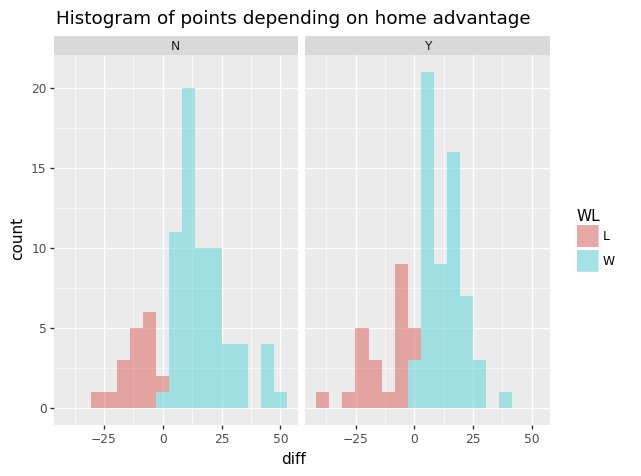

<ggplot: (7536346039)>

In [16]:
p9.ggplot(data) \
+ p9.aes(x = 'diff', fill = 'WL') \
+ p9.geom_histogram(alpha=.5) \
+ p9.facet_wrap('~home', ncol = 4) \
+ p9.labels.ggtitle('Histogram of points depending on home advantage')

Specifically, we drew a plot of points difference between GSW and opponents. Obviously, non-positive values mean that GSW lost. We saw that winnning rate is slightly higher at other places than GSW's home stadium. As seen in the plot above, it seems like there is no advantage of home stadiums. Plus, no matter where plays are done, this team does so well.

## Assistance Effect on Scores

In [2]:
from bs4 import BeautifulSoup, Comment
import requests
# Here, we're just importing both Beautiful Soup and the Requests library

page_link = 'https://www.basketball-reference.com/boxscores/201710170CLE.html'
# this is the url that we've already determined is safe and legal to scrape from.

page_response = requests.get(page_link, timeout=5)
# here, we fetch the content from the url, using the requests library

page_content = BeautifulSoup(page_response.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.

In [38]:
##  pip install nba_api

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
warriors = [team for team in nba_teams if team['abbreviation'] == 'GSW'][0]
warriors_id = warriors['id']

from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=warriors_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]

games.SEASON_ID = games.SEASON_ID.str[-4:].map(int)
games_all = games[games.SEASON_ID >= 2012]
games_all  

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,2018,1610612744,GSW,Golden State Warriors,0021800344,2018-12-03,GSW @ ATL,W,240,128,...,0.864,6.0,33.0,39.0,33,10.0,8,20.0,24,17.0
1,2018,1610612744,GSW,Golden State Warriors,0021800331,2018-12-01,GSW @ DET,L,239,102,...,0.857,8.0,36.0,44.0,23,6.0,5,14.0,22,-9.0
2,2018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6.0,5,14.0,22,-3.0
3,2018,1610612744,GSW,Golden State Warriors,0021800300,2018-11-26,GSW vs. ORL,W,240,116,...,0.913,10.0,36.0,46.0,21,8.0,7,14.0,19,6.0
4,2018,1610612744,GSW,Golden State Warriors,0021800285,2018-11-24,GSW vs. SAC,W,238,117,...,0.862,12.0,42.0,54.0,28,5.0,6,14.0,24,1.0
5,2018,1610612744,GSW,Golden State Warriors,0021800277,2018-11-23,GSW vs. POR,W,241,125,...,0.750,6.0,37.0,43.0,29,11.0,10,15.0,22,28.0
6,2018,1610612744,GSW,Golden State Warriors,0021800264,2018-11-21,GSW vs. OKC,L,241,95,...,0.667,7.0,35.0,42.0,24,7.0,10,17.0,18,-28.0
7,2018,1610612744,GSW,Golden State Warriors,0021800238,2018-11-18,GSW @ SAS,L,239,92,...,0.810,10.0,36.0,46.0,20,6.0,4,11.0,17,-12.0
8,2018,1610612744,GSW,Golden State Warriors,0021800232,2018-11-17,GSW @ DAL,L,241,109,...,0.941,12.0,35.0,47.0,24,6.0,6,12.0,27,-3.0
9,2018,1610612744,GSW,Golden State Warriors,0021800213,2018-11-15,GSW @ HOU,L,238,86,...,0.818,12.0,32.0,44.0,18,2.0,5,16.0,24,-21.0


In [39]:
games_all.columns  

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [40]:
ast = games_all[['SEASON_ID','AST', 'WL']]
ast.dropna(inplace = True) # there is one row without play outcome, so drop it
ast.head(15)

,SEASON_ID,AST,WL
0,2018,33,W
1,2018,23,L
2,2018,27,L
3,2018,21,W
4,2018,28,W
5,2018,29,W
6,2018,24,L
7,2018,20,L
8,2018,24,L
9,2018,18,L


In [47]:
# average AST values for each season among every NBA teams
total_games = leaguegamefinder.LeagueGameFinder()
tgames = total_games.get_data_frames()[0]
tgames.SEASON_ID = tgames.SEASON_ID.str[-4:].map(int)
tgames_all = tgames[tgames.SEASON_ID >= 2012]
avg_ast = pd.DataFrame(tgames_all.groupby('SEASON_ID')['AST'].mean().round(2))
avg_ast.columns = ['Others']

In [48]:
avg_ast_gsw = pd.DataFrame(ast.groupby('SEASON_ID')['AST'].mean().round(2))
avg_ast_gsw.columns = ['GSW']

In [71]:
result = pd.concat([avg_ast, avg_ast_gsw], axis=1)
result

,Others,GSW
SEASON_ID,,
2012,20.58,21.80
2013,20.72,22.50
2014,20.91,26.18
2015,20.81,26.99
2016,21.26,28.95
2017,22.04,27.83
2018,21.27,24.95


Text(0, 0.5, 'Counts')

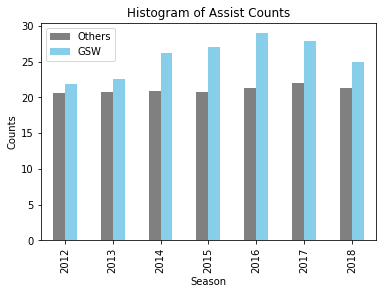

In [85]:
result.plot.bar(color = ['grey','skyblue'])
plt.title("Histogram of Assist Counts")
plt.xlabel("Season")
plt.ylabel("Counts")

## Predictions

In [116]:
# train set, 2016 season
total_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]
total_games = total_games[total_games.SEASON_ID.str[-4:] == '2016']

In [117]:
total_games.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [118]:
total_games['WL'].replace("W",1,inplace = True)
total_games['WL'].replace("L",0,inplace = True)

total_games.dropna(inplace=True)

In [119]:
y = total_games.WL
X = total_games[['FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV']]
X.head()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV
6537,47,88,0.534,11,24,0.458,15,23,0.652,12,28,40,22,6,5,14
6538,46,90,0.511,14,38,0.368,23,28,0.821,13,29,42,27,8,2,13
6551,46,87,0.529,24,45,0.533,21,31,0.677,11,30,41,27,6,3,11
6555,39,87,0.448,11,39,0.282,27,36,0.750,16,24,40,26,5,6,12
6559,40,83,0.482,16,33,0.485,22,24,0.917,8,36,44,29,8,4,18


In [122]:
# games for 2017 season (test set)
games_201718 = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]
games_201718 = games_201718[games_201718.SEASON_ID.str[-4:] == '2017']
games_201718.dropna(inplace = True)

In [124]:
y17 = games_201718.WL
X17 = games_201718[['FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV']]
y17.replace("W",1,inplace = True)
y17.replace("L",0,inplace = True)

In [125]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
predictions = logisticRegr.predict(X17)

In [134]:
score = logisticRegr.score(X17, y17)
print(score)

0.8430305567182922


Our Accuracy was about 84.3%

## Confusion Matrix

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [136]:
cm = metrics.confusion_matrix(y17, predictions)

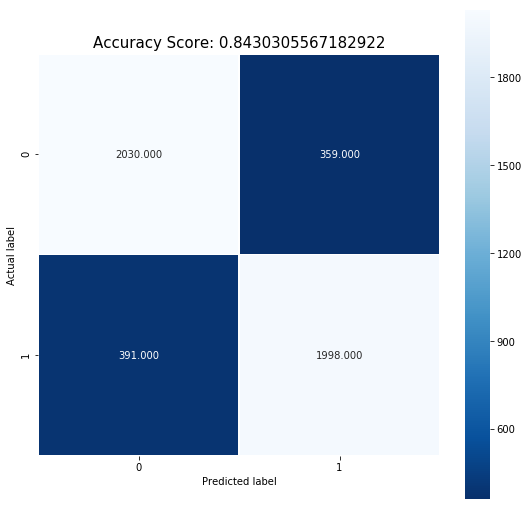

In [137]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);